### <div align='center'>**L2 Regularization (Ridge Regression)**</div>

---

### **1. What is L2 Regularization?**
L2 Regularization, also known as **Ridge Regression**, is a type of linear regression that adds a **L2 penalty** (squared magnitude of coefficients) to the loss function. It is primarily used to prevent overfitting by shrinking the coefficients of less important features.

---

### **2. Ridge Regression Formula**
The cost function for Ridge Regression is:

$$ J(\theta) = \text{MSE} + \lambda \sum_{i=1}^{n} \theta_i^2 $$

Where:

- $ J(\theta) $: Cost function.
- $ \text{MSE} $: Mean Squared Error. 
$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 $$
- $ \lambda $: Regularization parameter (controls the strength of regularization).
- $ \theta $: Coefficients of the model.


---

### **3. Key Characteristics**
1. **Prevents Overfitting**:
   - By adding a penalty to large coefficients, Ridge Regression reduces the complexity of the model and prevents overfitting.

2. **Does Not Perform Feature Selection**:
   - Unlike Lasso Regression, Ridge Regression does not shrink coefficients to zero. Instead, it reduces their magnitude.

3. **Works Well with Multicollinearity**:
   - Ridge Regression is effective when features are highly correlated, as it distributes the weights more evenly.

---

### **4. How L2 Regularization Works**
1. **Penalty Term**:
   - The penalty term ($ \lambda \sum \theta_i^2 $) adds a constraint to the optimization problem, forcing the coefficients to shrink.

2. **Effect of λ**:
   - **Small λ**: Minimal regularization, behaves like ordinary least squares regression.
   - **Large λ**: Strong regularization, shrinks coefficients more aggressively.

3. **Optimization**:
   - Ridge Regression uses gradient descent or closed-form solutions to optimize the cost function.

---

### **5. Applications of L2 Regularization**
1. **Regression Tasks**:
   - Predicting house prices, stock prices, and other continuous variables.

2. **Multicollinearity**:
   - Used in datasets with highly correlated features to stabilize the model.

3. **High-Dimensional Data**:
   - Effective in text classification, gene selection, and other high-dimensional problems.
---

### **6. L2 Regularization vs L1 Regularization**
| **Aspect**               | **L2 Regularization (Ridge)**       | **L1 Regularization (Lasso)**         |
|---------------------------|-------------------------------------|---------------------------------------|
| **Penalty**               | $ \lambda \sum \theta_i^2 $      | $ \lambda \sum \theta_i $         |
| **Feature Selection**     | Does not shrink coefficients to zero | Shrinks some coefficients to zero    |
| **Model Complexity**      | Produces dense models              | Produces sparse models                |
| **Multicollinearity**     | Handles multicollinearity better   | May arbitrarily select one feature    |

### Implementation of L2 Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
concrete_data = pd.read_excel(url)

concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


### EDA

In [3]:
print(f"Dataset Shape: {concrete_data.shape}")

print("\nDataset Statistics:")
concrete_data.describe()


Dataset Shape: (1030, 9)

Dataset Statistics:


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


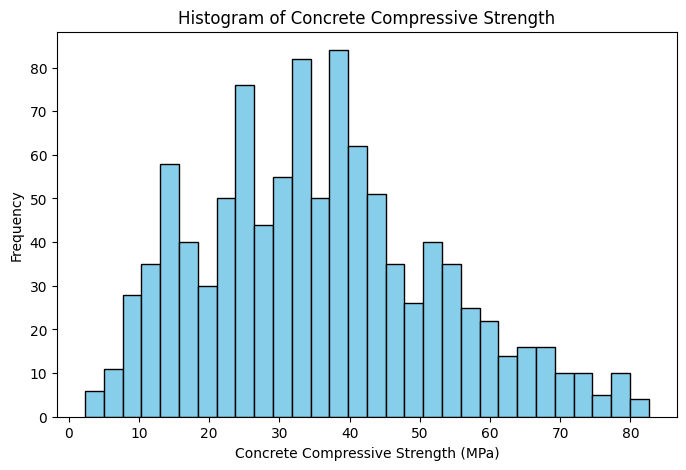

In [4]:
target_column = 'Concrete compressive strength(MPa, megapascals) '
plt.figure(figsize=(8, 5))
plt.hist(concrete_data[target_column], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Concrete Compressive Strength')
plt.xlabel('Concrete Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

### Preprocessing

In [5]:
X = concrete_data.drop(target_column, axis=1)
y = concrete_data[target_column]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Building the model

In [6]:
# Define a grid of hyperparameters for alpha (regularization strength)
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best alpha
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

Best alpha: 1


### Train the model

In [7]:
optimized_ridge = Ridge(alpha=best_alpha)
optimized_ridge.fit(X_train, y_train)

y_pred = optimized_ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 95.96807177697528
R-squared: 0.6275703720172157


### Analyzing Coefficients


Ridge Coefficients:
                                             Feature  Coefficient
0          Cement (component 1)(kg in a m^3 mixture)    12.214639
1  Blast Furnace Slag (component 2)(kg in a m^3 m...     9.147397
7                                          Age (day)     7.331743
2         Fly Ash (component 3)(kg in a m^3 mixture)     5.067807
4  Superplasticizer (component 5)(kg in a m^3 mix...     1.845122
6  Fine Aggregate (component 7)(kg in a m^3 mixture)     1.740817
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...     1.238733
3          Water  (component 4)(kg in a m^3 mixture)    -3.038571


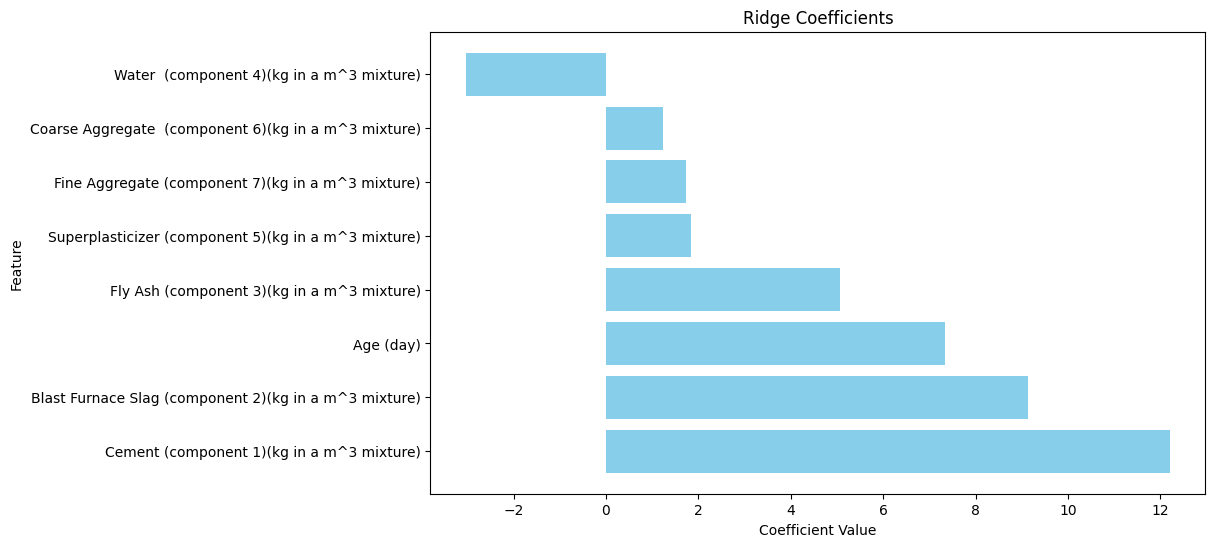

In [8]:
coefficients = pd.DataFrame({
    'Feature': concrete_data.columns[:-1],
    'Coefficient': optimized_ridge.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nRidge Coefficients:")
print(coefficients)

plt.figure(figsize=(10, 6))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.title('Ridge Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()